# Find all the CPTAC subjects


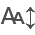

In [1]:
import numpy as np
import pandas as pd
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)
import itables.options as opt

opt.classes="display nowrap compact"
opt.buttons=["copyHtml5", "csvHtml5", "excelHtml5"]
opt.maxBytes=0

In [2]:
from cdapython import tables, columns, column_values, fetch_rows, summary_counts

I'm a researcher, and I want to reuse data from the Clinical Proteomic Tumor Analysis Consortium, but it's been stored across multiple data centers. I just want an easy way to track it all down.

First, decide what column to search. I'm looking for columns that have to do with `project`:

In [3]:
columns(column=["*project*"])

table                       column data_type  nullable  \
0   researchsubject   member_of_research_project      text      True   
1  somatic_mutation           project_short_name      text      True   
2          specimen  specimen_associated_project      text      True   

                                         description  
0  A reference to the Study(s) of which this Rese...  
1  Project name abbreviation; the program name ap...  
2          The Project associated with the specimen.

`member_of_research_project` has the definition I'm looking for, so I'm going to search that for `cptac`. I want both subject and researchsubject info, so I'm requesting rows that match `cptac` from those two tables, joined:

In [4]:
fetch_rows(table="subject", match_all="member_of_research_project = *cptac*", link_to_table='researchsubject')

subject_id  cause_of_death  \
0     Clinical Proteomic Tumor Analysis Consortium.C...  Cancer Related   
1     Clinical Proteomic Tumor Analysis Consortium.C...  Cancer Related   
2     Clinical Proteomic Tumor Analysis Consortium.C...  Cancer Related   
3     Clinical Proteomic Tumor Analysis Consortium.C...  Cancer Related   
4     Clinical Proteomic Tumor Analysis Consortium.C...            <NA>   
...                                                 ...             ...   
9905                               cptac_ucec.C3L-03152            <NA>   
9906                               cptac_ucec.C3L-03594            <NA>   
9907                               cptac_ucec.C3N-01763            <NA>   
9908                               cptac_ucec.C3N-01821            <NA>   
9909                               cptac_ucec.C3N-03044            <NA>   

      days_to_birth  days_to_death ethnicity   race   sex       species  \
0            -27653           1099      <NA>   <NA>  male  Homo sapiens   
1            -27653           1099      <NA>   <NA>  male  Homo sapiens   
2            -27653           1099      <NA>   <NA>  male  Homo sapiens   
3            -27653           1099      <NA>   <NA>  male  Homo sapiens   
4            -24917           <NA>      <NA>  Asian  male  Homo sapiens   
...             ...            ...       ...    ...   ...           ...   
9905           <NA>           <NA>     White   <NA>     F  Homo sapiens   
9906           <NA>           <NA>      <NA>   <NA>  <NA>  Homo sapiens   
9907           <NA>           <NA>      <NA>   <NA>     F  Homo sapiens   
9908           <NA>           <NA>      <NA>   <NA>  <NA>  Homo sapiens   
9909           <NA>           <NA>      <NA>   <NA>     F  Homo sapiens   

     vital_status       researchsubject_id member_of_research_project  \
0            Dead   cptac_pda.C3L-00395.RS                  cptac_pda   
1            Dead      PDC000341.C3L-00395                  PDC000341   
2            Dead      PDC000526.C3L-00395                  PDC000526   
3            Dead      PDC000527.C3L-00395                  PDC000527   
4           Alive   cptac_pda.C3L-03129.RS                  cptac_pda   
...           ...                      ...                        ...   
9905         <NA>  cptac_ucec.C3L-03152.RS                 cptac_ucec   
9906         <NA>  cptac_ucec.C3L-03594.RS                 cptac_ucec   
9907         <NA>  cptac_ucec.C3N-01763.RS                 cptac_ucec   
9908         <NA>  cptac_ucec.C3N-01821.RS                 cptac_ucec   
9909         <NA>  cptac_ucec.C3N-03044.RS                 cptac_ucec   

           primary_diagnosis_condition primary_diagnosis_site  
0                Ductal Adenocarcinoma               Pancreas  
1     Pancreatic Ductal Adenocarcinoma               Pancreas  
2     Pancreatic Ductal Adenocarcinoma               Pancreas  
3     Pancreatic Ductal Adenocarcinoma               Pancreas  
4                Ductal Adenocarcinoma               Pancreas  
...                                ...                    ...  
9905      Corpus Endometrial Carcinoma                 Uterus  
9906      Corpus Endometrial Carcinoma                 Uterus  
9907      Corpus Endometrial Carcinoma                 Uterus  
9908      Corpus Endometrial Carcinoma                 Uterus  
9909      Corpus Endometrial Carcinoma                 Uterus  

[9910 rows x 13 columns]

This looks like what I want, so I'll re-run the query but save it to a file this time:

In [5]:
fetch_rows(table="subject", match_all="member_of_research_project = *cptac*", link_to_table='researchsubject', return_data_as='tsv', output_file='my_file.tsv')